### Тема “Обучение без учителя”

# Задание 1.

In [310]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d.axes3d import Axes3D

from sklearn.datasets import load_boston

In [311]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [312]:
data = boston["data"]
data.shape

(506, 13)

In [313]:
target = boston["target"]
target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [314]:
feature_names = boston["feature_names"]
feature_names.shape

DESCR = boston["DESCR"]

X = pd.DataFrame(data, columns = feature_names) #  создание датафрейма Х

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [315]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [316]:
y = pd.DataFrame(target, columns=["price"])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [317]:
from sklearn.model_selection import train_test_split

In [318]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) #Разбиение выборки на тренировочную и тестовую

In [319]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # масштабирование данных
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index = X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index = X_test.index)

features = X_train_scaled.iloc[:, :]
features.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,354.0,-1.262330e-16,1.001415,-0.416762,-0.407940,-0.386964,-0.022663,10.296908
ZN,354.0,-4.829784e-17,1.001415,-0.505125,-0.505125,-0.505125,0.380752,3.702790
INDUS,354.0,3.724736e-15,1.001415,-1.432137,-0.866386,-0.208267,1.005500,2.396785
CHAS,354.0,-6.680155e-17,1.001415,-0.281546,-0.281546,-0.281546,-0.281546,3.551814
NOX,354.0,-5.443229e-15,1.001415,-1.477013,-0.919680,-0.165136,0.632279,2.690124
RM,354.0,-1.594064e-15,1.001415,-3.428977,-0.607318,-0.136693,0.495796,3.417358
AGE,354.0,-6.962416e-17,1.001415,-2.385402,-0.824387,0.309498,0.893182,1.129371
DIS,354.0,-2.244595e-15,1.001415,-1.241753,-0.797057,-0.310205,0.770045,3.938069
RAD,354.0,-8.185543e-17,1.001415,-0.977989,-0.630274,-0.514369,1.687825,1.687825
TAX,354.0,-1.890359e-16,1.001415,-1.323270,-0.770009,-0.463310,1.557294,1.827911


In [320]:
from sklearn.manifold import TSNE

In [321]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42) # построение модели T-SNE на тренировочных данных

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(354, 13)
После:	(354, 2)


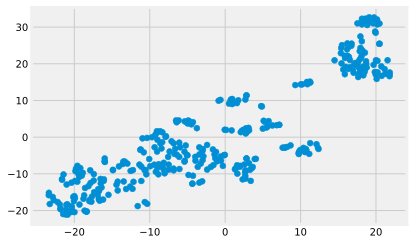

In [322]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1]) # построение диаграммы рассеивания данных

plt.show()

# Задание 2.

In [323]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d.axes3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error

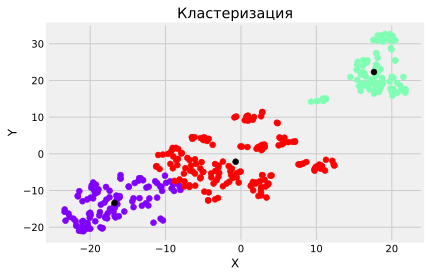

In [364]:
model_3_clusters = KMeans(n_clusters=3, max_iter = 100, random_state = 42)
model_3_clusters_fit = model_3_clusters.fit(X_train_tsne)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = model_3_clusters_fit.labels_, cmap='rainbow')
plt.scatter(model_3_clusters_fit.cluster_centers_[:,0] ,model_3_clusters_fit.cluster_centers_[:,1], color='black') # Центры кластеров

plt.xlabel('X')
plt.ylabel('Y')

plt.title('Кластеризация')

plt.show()

In [355]:
print('Средние значения Price по кластерам:')
Clust_0_price = y_train[X_train_tsne == 0].mean()
print(Clust_0_price)
Clust_1_price = y_train[X_train_tsne == 1].mean()
print(Clust_1_price)
Clust_2_price = y_train[X_train_tsne == 2].mean()
print(Clust_2_price)


print('Средние значения Crim по кластерам:')
Clust_0_CRIM = X_train.loc[X_train_tsne == 0, 'CRIM'].mean()
print(Clust_0_CRIM)
Clust_1_CRIM = X_train.loc[X_train_tsne == 1, 'CRIM'].mean()
print(Clust_1_CRIM)
Clust_2_CRIM = X_train.loc[X_train_tsne == 2, 'CRIM'].mean()
print(Clust_2_CRIM)

Средние значения Price по кластерам:
price   NaN
dtype: float64
price   NaN
dtype: float64
price   NaN
dtype: float64
Средние значения Crim по кластерам:
nan
nan
nan


# Задание 3.

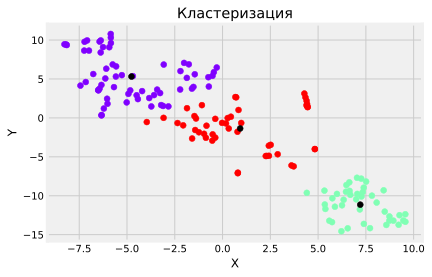

In [337]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

model_3_clusters = KMeans(n_clusters=3, max_iter = 100, random_state = 42)
model_3_clusters_fit = model_3_clusters.fit(X_test_tsne)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c = model_3_clusters_fit.labels_, cmap='rainbow')
plt.scatter(model_3_clusters_fit.cluster_centers_[:,0] ,model_3_clusters_fit.cluster_centers_[:,1], color='black')

plt.xlabel('X')
plt.ylabel('Y')

plt.title('Кластеризация')

plt.show()